## <font color='crimson'>**#1 Data Preparation**</font>

  

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Read the data using pandas read_csv function
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Motor_Vehicle_Collisions_-_Crashes_20250104.csv")

<ipython-input-7-a2635ebd91c5>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Motor_Vehicle_Collisions_-_Crashes_20250104.csv")


In [8]:
# Print the first 5 rows of the data using head function of pandas
data.head(5)
print(data.columns)

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')


In [9]:
# Describe the data using the describe function of pandas
desc_stats = data.describe()
desc_stats

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,1.907120e+06,1.907120e+06,2.146646e+06,2.146633e+06,2.146664e+06,2.146664e+06,2.146664e+06,2.146664e+06,2.146664e+06,2.146664e+06,2.146664e+06
mean,4.062064e+01,-7.373927e+01,3.194681e-01,1.541950e-03,5.810644e-02,7.621127e-04,2.795640e-02,1.206523e-04,2.291896e-01,6.344728e-04,3.212324e+06
std,2.050499e+00,3.841687e+00,7.079647e-01,4.144304e-02,2.471785e-01,2.816397e-02,1.669818e-01,1.102586e-02,6.691165e-01,2.754842e-02,1.507056e+06
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.066756e+01,-7.397469e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.172786e+06
50%,4.072055e+01,-7.392705e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.709598e+06
75%,4.076962e+01,-7.386674e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.246494e+06
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.783389e+06


###metrics explanation

1. Latitude & Longitude: The latitude and longitude indicate where the crashes are occurring. However, there are some data points with latitude and longitude values of 0, which is likely due to missing or inaccurate data.

2. Number of Persons Injured: On average, each crash has around 0.305 injuries. The maximum number of injuries in a single crash is 43.

3. Number of Persons Killed: Fatalities are rare, with an average of 0.00146 deaths per crash. The maximum number of deaths in one crash is 8.

4. Number of Pedestrians, Cyclists, and Motorists Injured/Killed: These columns provide a breakdown of the injuries and fatalities by type of individual involved.

5. Collision ID: This is a unique identifier for each crash.



---



##<font color='crimson'> **#2 - Data Ethics, Pre-Processing, and Exploration** </font>


In [10]:
#Check the dataset for missing values.
missing_values = data.isnull().sum()
missing_values_percentage = (missing_values) / len(data) * 100

#Return counts and percentages of missing values in each column
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)':missing_values_percentage})
missing_data.sort_values(by='Percentage (%)', ascending=False)

,Missing Values,Percentage (%)
VEHICLE TYPE CODE 5,2137355,99.566350
CONTRIBUTING FACTOR VEHICLE 5,2137059,99.552562
VEHICLE TYPE CODE 4,2112763,98.420759
CONTRIBUTING FACTOR VEHICLE 4,2111505,98.362156
VEHICLE TYPE CODE 3,1997909,93.070411
CONTRIBUTING FACTOR VEHICLE 3,1992088,92.799246
OFF STREET NAME,1778132,82.832339
CROSS STREET NAME,818433,38.125808
ZIP CODE,665824,31.016684
BOROUGH,665561,31.004433


Here's an overview of the missing values in the dataset:

Columns like VEHICLE TYPE CODE 5, CONTRIBUTING FACTOR VEHICLE 5, VEHICLE TYPE CODE 4, and so on have a high percentage of missing values. This is expected since not all crashes involve multiple vehicles or factors.

OFF STREET NAME and CROSS STREET NAME have significant missing values. This could be due to crashes occurring in locations where these details aren't applicable or weren't recorded.

ZIP CODE, BOROUGH, and ON STREET NAME also have missing values. This might be due to incomplete data entry or crashes occurring in areas where these specifics aren't easily determinable.

LOCATION, LATITUDE, and LONGITUDE have the same count of missing values, indicating that when one is missing, the others are likely missing as well.

In [11]:
#display the top 10 contributing factors

top_factors = data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(10)


plt.figure(figsize=(12, 7))

top_factors

,count
CONTRIBUTING FACTOR VEHICLE 1,
Unspecified,724508
Driver Inattention/Distraction,432672
Failure to Yield Right-of-Way,128064
Following Too Closely,115151
Backing Unsafely,78837
Other Vehicular,66647
Passing or Lane Usage Improper,60774
Passing Too Closely,54031
Turning Improperly,52917


<Figure size 1200x700 with 0 Axes>

<ipython-input-12-8a6fe8729961>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_factors, palette="magma")


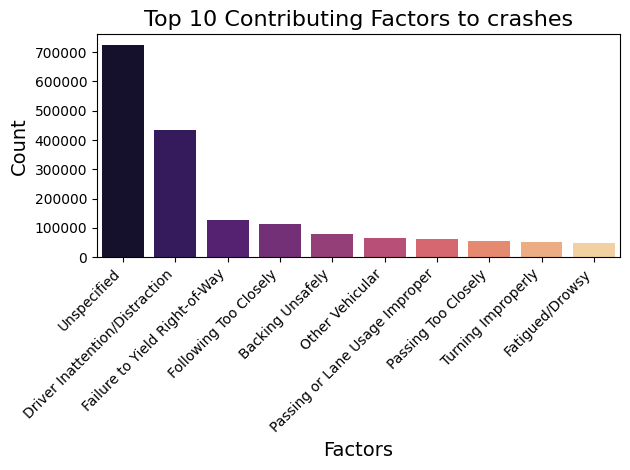

In [12]:
# Plotting the top contributing factors, fill in x as the index field of the variable 'top_factors'
sns.barplot(data=top_factors, palette="magma")
plt.title('Top 10 Contributing Factors to crashes', fontsize=16)
plt.xlabel('Factors', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

top 3 contributing factors that cause the most crashes?

> *  Distraction
> *  Failure to Yield Right-of-Way
> *  Following Too Closely

In [13]:
# Determine the top vehicle types involved in crashes
top_vehicle_types = data['VEHICLE TYPE CODE 1'].value_counts().head(10)
top_vehicle_types

,count
VEHICLE TYPE CODE 1,
Sedan,608420
Station Wagon/Sport Utility Vehicle,477886
PASSENGER VEHICLE,416206
SPORT UTILITY / STATION WAGON,180291
Taxi,53625
4 dr sedan,40181
Pick-up Truck,36409
TAXI,31911
Box Truck,25420


<ipython-input-14-975564d07a9d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_vehicle_types, palette="cividis")


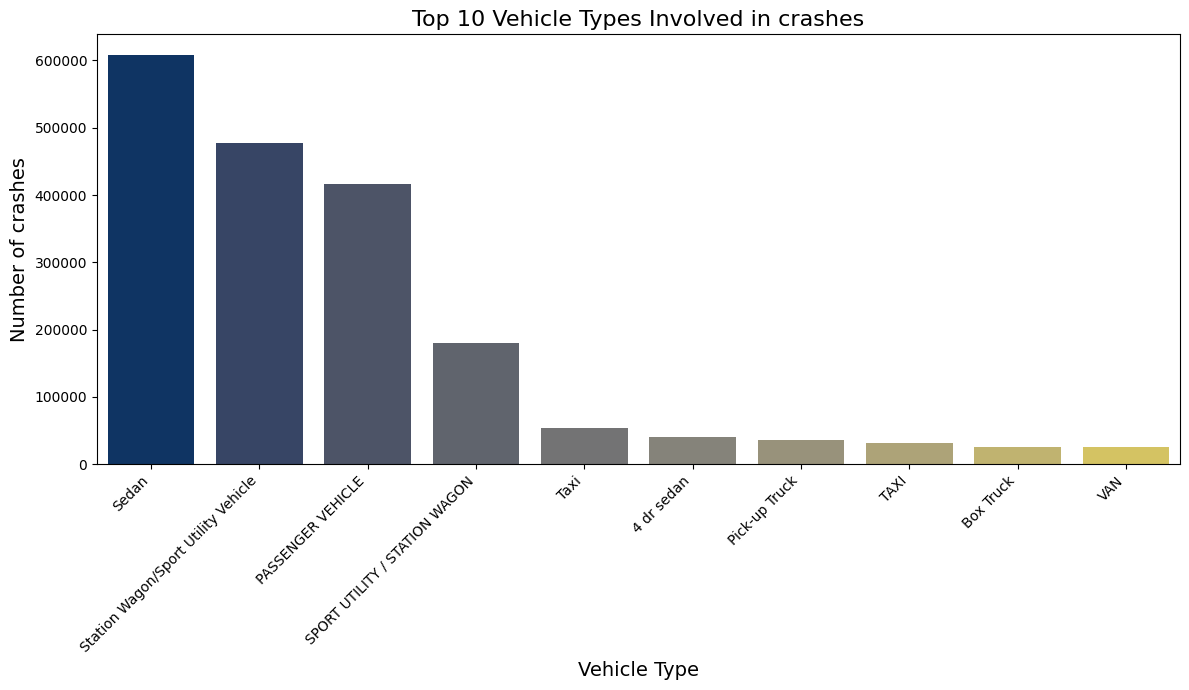

In [14]:
# Plotting the top vehicle types
plt.figure(figsize=(12, 7))
sns.barplot(data=top_vehicle_types, palette="cividis")
plt.title('Top 10 Vehicle Types Involved in crashes', fontsize=16)
plt.xlabel('Vehicle Type', fontsize=14)
plt.ylabel('Number of crashes', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


top 3 vehicles that were most involved in crashes?


> *   Sedan
> *   Station Wagon/Sport Utility Vehicle
> *   Passenger Vehicle







---

In [16]:
#to combine contributing factors and vehicle type
data['ALL_CONTRIBUTING_FACTORS'] = data[['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2']].fillna('Unknown').agg(', '.join, axis=1)


In [17]:
# Initialize an empty list
factor = []

# Extract unique values from the specified columns and append them to the list
unique_factors = data[['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2']].stack().unique()
factor.extend(unique_factors)  # Use extend to add elements individually instead of appending a single object

# Display the resulting list
factor

vehicle_type_mapping = {
    # Passenger Vehicles
    'Sedan': 'Passenger Vehicle',
    '4 dr sedan': 'Passenger Vehicle',
    'SUV': 'Passenger Vehicle',
    'Taxi': 'Passenger Vehicle',
    'Van': 'Passenger Vehicle',
    'Minivan': 'Passenger Vehicle',
    'Limousine': 'Passenger Vehicle',

    # Commercial Vehicles
    'Box Truck': 'Commercial Vehicle',
    'Dump Truck': 'Commercial Vehicle',
    'Tractor Truck': 'Commercial Vehicle',
    'Delivery Truck': 'Commercial Vehicle',
    'Bus': 'Commercial Vehicle',
    'School Bus': 'Commercial Vehicle',
    'Shuttle Bus': 'Commercial Vehicle',

    # Emergency Vehicles
    'Ambulance': 'Emergency Vehicle',
    'Fire Truck': 'Emergency Vehicle',
    'Police': 'Emergency Vehicle',

    # Two-Wheelers
    'Motorcycle': 'Two-Wheeler',
    'Scooter': 'Two-Wheeler',
    'E-Scooter': 'Two-Wheeler',
    'Bike': 'Two-Wheeler',
    'E-Bike': 'Two-Wheeler',

    # Heavy Equipment
    'Crane Truck': 'Heavy Equipment',
    'Excavator': 'Heavy Equipment',
    'Forklift': 'Heavy Equipment',

    # Specialty Vehicles
    'RV': 'Specialty Vehicle',
    'Golf Cart': 'Specialty Vehicle',
    'Trailer': 'Specialty Vehicle',

    # Unknown or Miscellaneous
    'UNKNOWN': 'Unknown',
    'UNK': 'Unknown',
    'Horse': 'Miscellaneous',
    'Carriage': 'Miscellaneous',
}
data['STANDARDIZED_VEHICLE_TYPE'] = data['VEHICLE TYPE CODE 1'].map(vehicle_type_mapping).fillna('Miscellaneous')


In [18]:
print(data['STANDARDIZED_VEHICLE_TYPE'].unique())
data['STANDARDIZED_VEHICLE_TYPE'].value_counts()
# Group by standardized vehicle type and contributing factor
vehicle_factors = data.groupby(['STANDARDIZED_VEHICLE_TYPE', 'CONTRIBUTING FACTOR VEHICLE 1']).size().reset_index(name='Count')

# Sort by vehicle type and count
vehicle_factors = vehicle_factors.sort_values(by=['STANDARDIZED_VEHICLE_TYPE', 'Count'], ascending=[True, False])

# Display top factors for each vehicle type
print(vehicle_factors)


['Passenger Vehicle' 'Miscellaneous' 'Commercial Vehicle' 'Two-Wheeler'
 'Emergency Vehicle' 'Specialty Vehicle' 'Unknown' 'Heavy Equipment']
    STANDARDIZED_VEHICLE_TYPE   CONTRIBUTING FACTOR VEHICLE 1  Count
10         Commercial Vehicle  Driver Inattention/Distraction  11538
51         Commercial Vehicle                     Unspecified   9197
32         Commercial Vehicle             Passing Too Closely   4555
33         Commercial Vehicle  Passing or Lane Usage Improper   3173
19         Commercial Vehicle           Following Too Closely   2945
..                        ...                             ...    ...
337                   Unknown            Unsafe Lane Changing      3
301                   Unknown          Cell Phone (hand-held)      1
312                   Unknown            Headlights Defective      1
330                   Unknown  Reaction to Uninvolved Vehicle      1
333                   Unknown             Tow Hitch Defective      1

[341 rows x 3 columns]


---

In [19]:
# Group by borough and contributing factor
location_factors = data.groupby(['BOROUGH', 'CONTRIBUTING FACTOR VEHICLE 1']).size().reset_index(name='Count')

# Sort by borough and count
location_factors = location_factors.sort_values(by=['BOROUGH', 'Count'], ascending=[True, False])

# Display top factors for each borough
print(location_factors)


           BOROUGH   CONTRIBUTING FACTOR VEHICLE 1  Count
55           BRONX                     Unspecified  90367
10           BRONX  Driver Inattention/Distraction  35848
17           BRONX   Failure to Yield Right-of-Way  10289
31           BRONX                 Other Vehicular   9793
5            BRONX                Backing Unsafely   9290
..             ...                             ...    ...
243  STATEN ISLAND                               1      2
300  STATEN ISLAND               Vehicle Vandalism      2
302  STATEN ISLAND           Windshield Inadequate      2
244  STATEN ISLAND                              80      1
252  STATEN ISLAND          Cell Phone (hand-held)      1

[303 rows x 3 columns]


    STANDARDIZED_VEHICLE_TYPE   CONTRIBUTING FACTOR VEHICLE 1   Count
111         Passenger Vehicle  Driver Inattention/Distraction  173168
120         Passenger Vehicle           Following Too Closely   59177
117         Passenger Vehicle   Failure to Yield Right-of-Way   47303
136         Passenger Vehicle  Passing or Lane Usage Improper   29957
107         Passenger Vehicle                Backing Unsafely   28033
135         Passenger Vehicle             Passing Too Closely   24413
153         Passenger Vehicle            Unsafe Lane Changing   22664
131         Passenger Vehicle                 Other Vehicular   21004
154         Passenger Vehicle                    Unsafe Speed   17932
152         Passenger Vehicle              Turning Improperly   16609


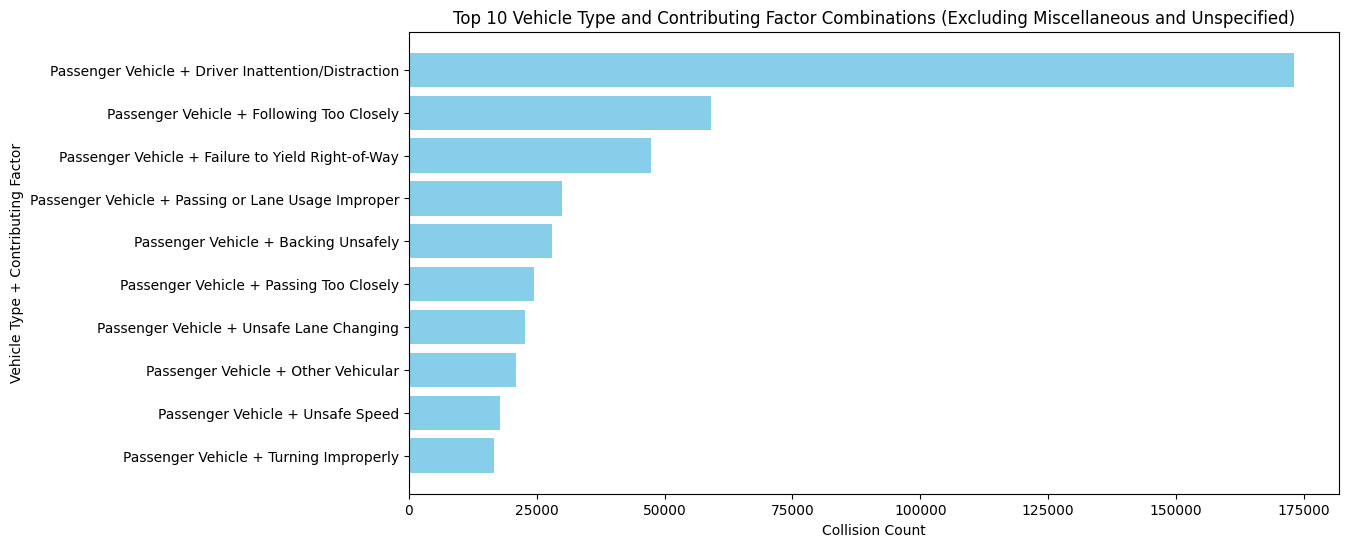

In [21]:
#clean Miscellaneous and Unspecified
filtered_data = vehicle_factors[
    (vehicle_factors['STANDARDIZED_VEHICLE_TYPE'] != 'Miscellaneous') &
    (vehicle_factors['CONTRIBUTING FACTOR VEHICLE 1'] != 'Unspecified')
]

# have the top 10 combinations
top_combinations = (
    filtered_data.groupby(['STANDARDIZED_VEHICLE_TYPE', 'CONTRIBUTING FACTOR VEHICLE 1'])['Count']
    .sum()
    .reset_index()
    .sort_values(by='Count', ascending=False)
    .head(10)
)

print(top_combinations)

# plot them
plt.figure(figsize=(12, 6))
plt.barh(
    top_combinations.apply(lambda x: f"{x['STANDARDIZED_VEHICLE_TYPE']} + {x['CONTRIBUTING FACTOR VEHICLE 1']}", axis=1),
    top_combinations['Count'],
    color='skyblue'
)
plt.xlabel('Collision Count')
plt.ylabel('Vehicle Type + Contributing Factor')
plt.title('Top 10 Vehicle Type and Contributing Factor Combinations (Excluding Miscellaneous and Unspecified)')
plt.gca().invert_yaxis()  # reverse y-axis， to have the largest number on the top
plt.show()



##<font color='crimson'> **#3 - Time Series Analysis**</font>


---

In [22]:
data['CRASH TIME']

,CRASH TIME
0,2:39
1,11:45
2,6:55
3,9:35
4,8:13
...,...
2146659,15:00
2146660,11:30
2146661,22:15
2146662,18:55


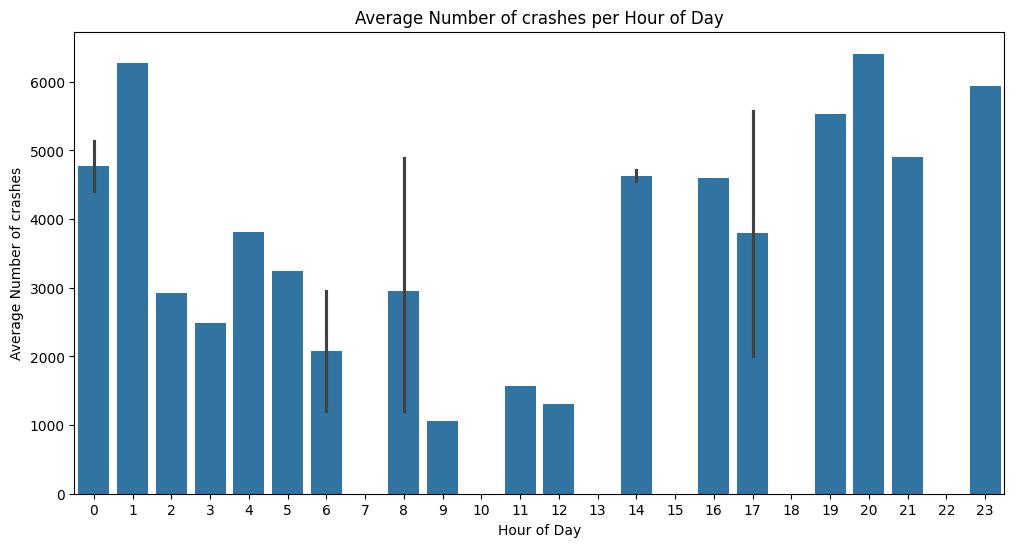

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
#file_path = "__________"
#data = pd.read_csv(file_path)

# Convert 'CRASH DATE' and 'CRASH TIME' to datetime
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])
data['CRASH TIME'] = pd.to_datetime(data['CRASH TIME'], format='%H:%M')

# Time of Day Analysis
data['Hour of Day'] = data['CRASH TIME'].dt.hour

# Group by 'Hour of Day' and calculate the average number of crashes per hour
average_crashes_per_hour = data.groupby('Hour of Day').size() / data['Hour of Day'].nunique()

# Plot the average number of crashes
plt.figure(figsize=(12, 6))
sns.barplot(x=data['Hour of Day'], y=average_crashes_per_hour )
plt.title('Average Number of crashes per Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of crashes')
plt.xticks(range(0, 24))
plt.show()




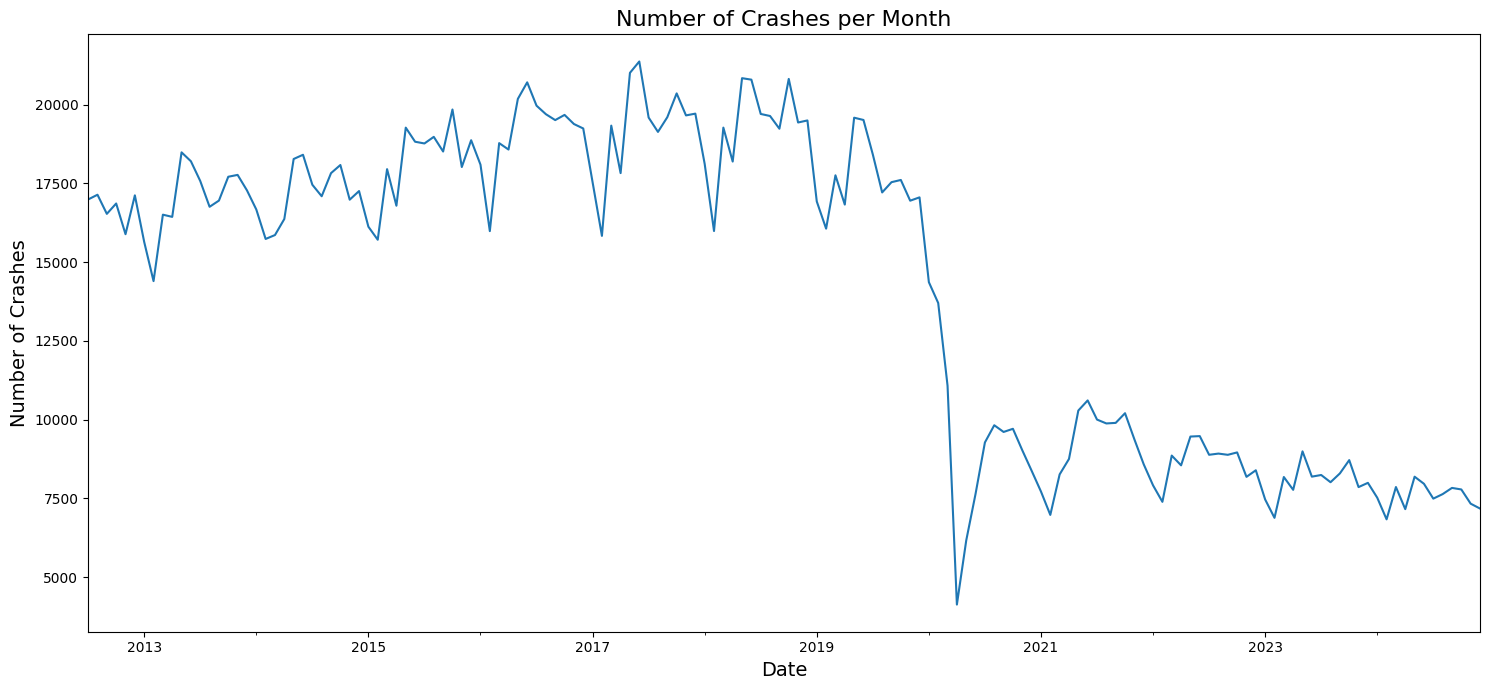

In [24]:

# Group by month and year to get the number of crashes per month
monthly_crashes = data.groupby(data['CRASH DATE'].dt.to_period("M")).size()

# Plotting the trend over time
plt.figure(figsize=(15, 7))
monthly_crashes.plot()
plt.title('Number of Crashes per Month', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)
plt.tight_layout()
plt.show()

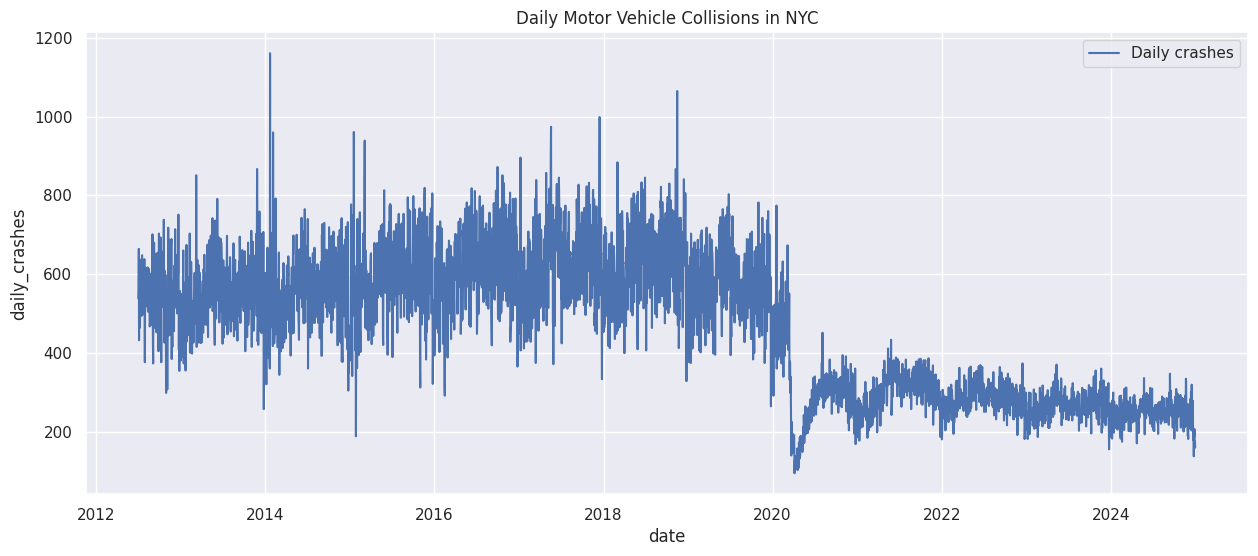

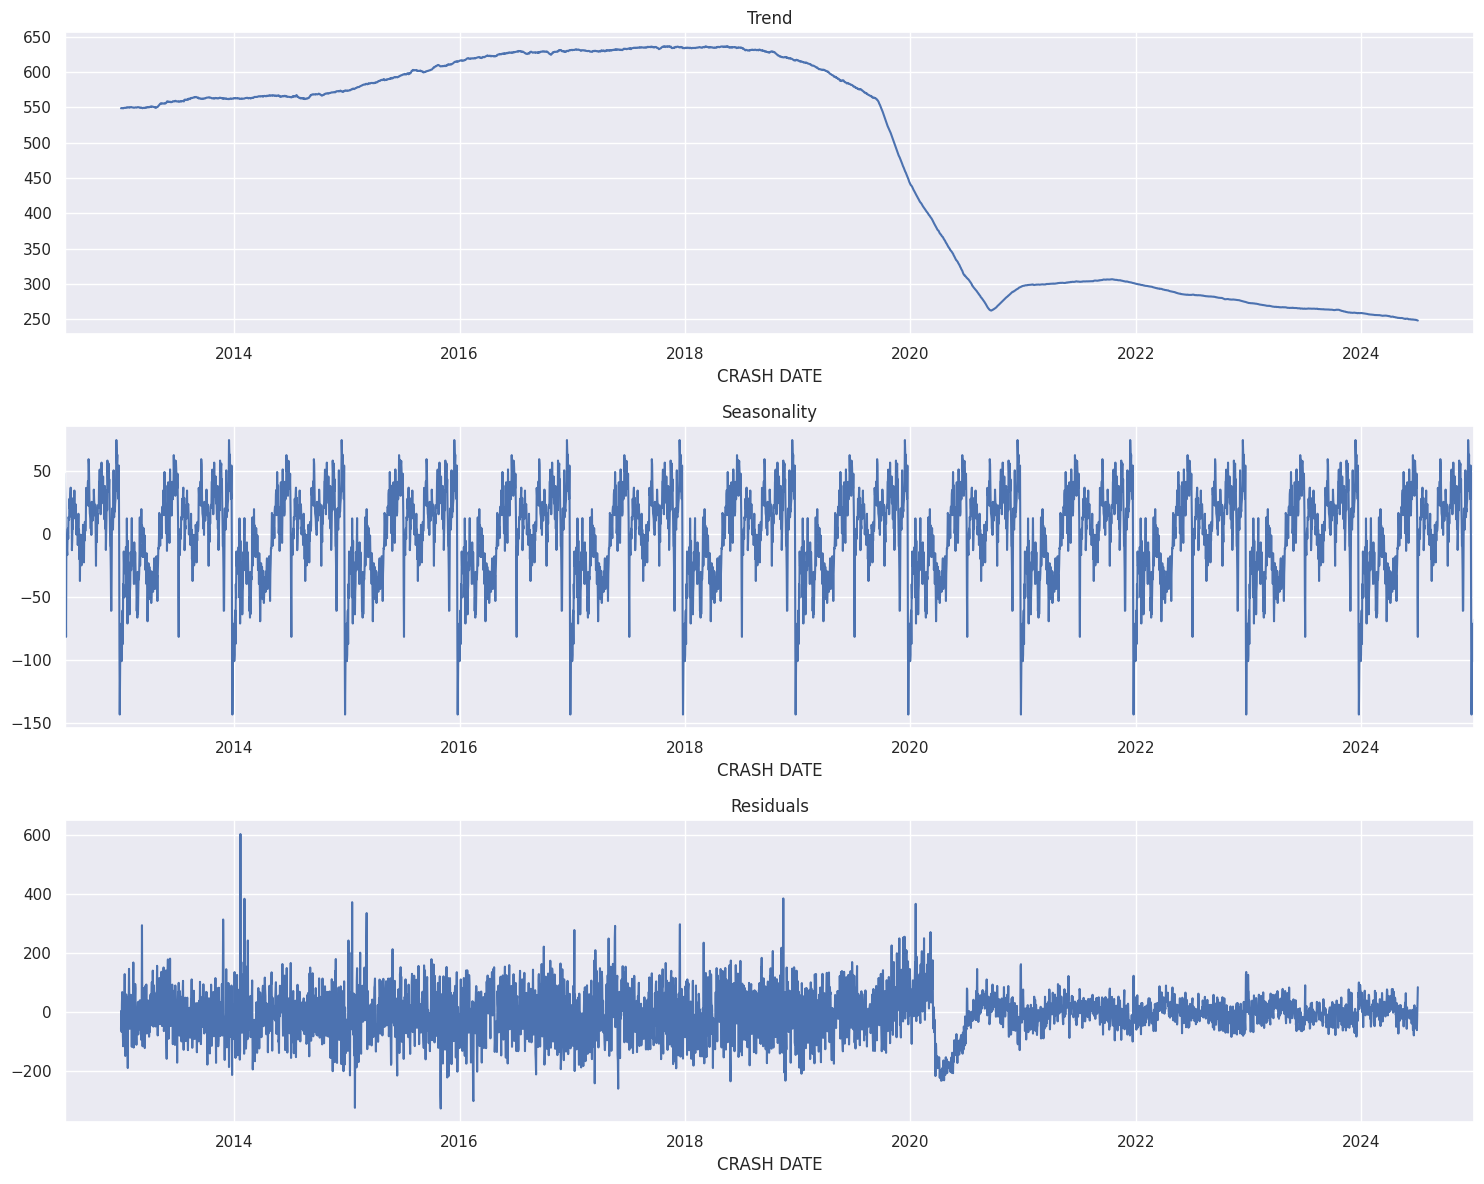

In [25]:
#time series decomposition to review trends, seasonality, and residuals

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Count the number of crashes per day, group by CRASH DATE
daily_crashes = data.groupby('CRASH DATE').size()

# Set plot style
sns.set(style="darkgrid")

# Plot the daily crashes time series
plt.figure(figsize=(15, 6))
plt.plot(daily_crashes, label='Daily crashes')
plt.title('Daily Motor Vehicle Collisions in NYC')
plt.xlabel('date')
plt.ylabel('daily_crashes')
plt.legend()
plt.show()

# Decompose the time series
decomposition = seasonal_decompose(daily_crashes, model='additive', period=365)

# Plot the decomposed components
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 12))
decomposition.trend.plot(ax=ax1)
ax1.set_title('Trend')
decomposition.seasonal.plot(ax=ax2)
ax2.set_title('Seasonality')
decomposition.resid.plot(ax=ax3)
ax3.set_title('Residuals')
plt.tight_layout()
plt.show()

##<font color='crimson'>**#4 - Geospatial Analysis**</font>
explore geospatial aspects of the dataset and get comfortable with regional analysis and geospatial visualizations.

techniques:
spatial regression,
machine learning,
network analysis

<ipython-input-26-c8ffb841fd64>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=borough_count.index, y=borough_count.values, palette="viridis")


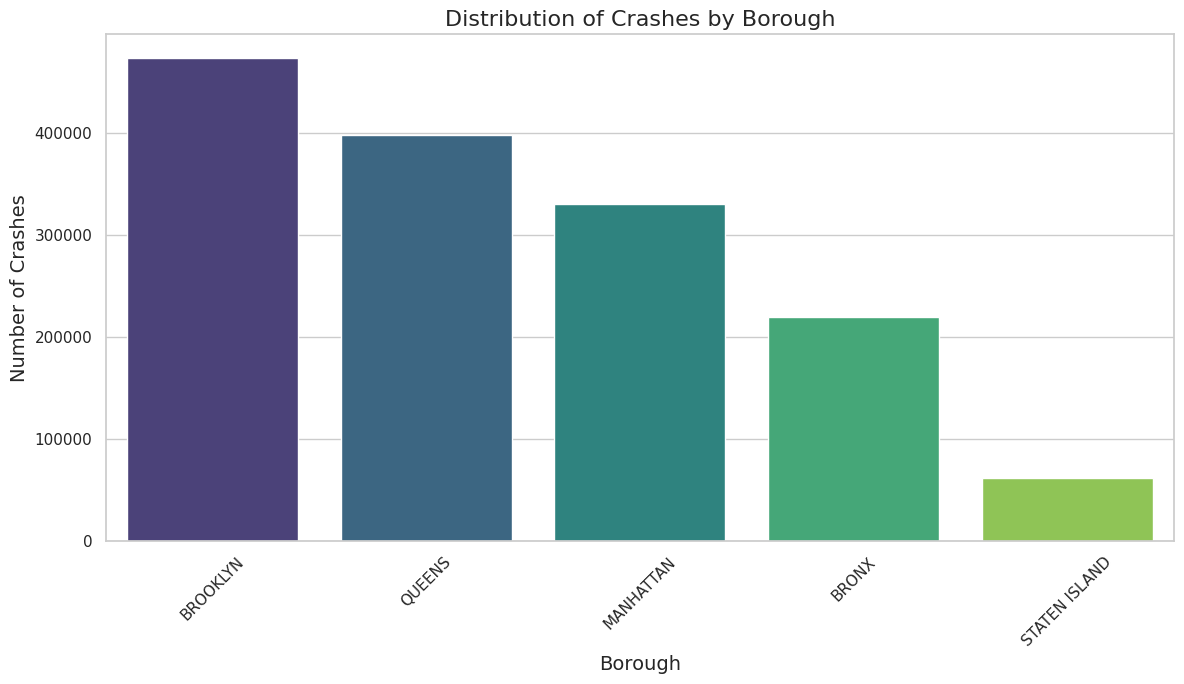

In [26]:
#Plot a bar chart to compare the number of crashes that occurred in each of the five boroughs.
# Set style
sns.set_style("whitegrid")

# Plotting the distribution of crashes by borough
plt.figure(figsize=(12, 7))
# Find the count of unique values of BOROUGHS. Hint: Use value_count function.
borough_count = data['BOROUGH'].value_counts()
sns.barplot(x=borough_count.index, y=borough_count.values, palette="viridis")
plt.title('Distribution of Crashes by Borough', fontsize=16)
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



> *  Brooklyn has the highest number of crashes due to its population density, major roads, and traffic volume.

> * Staten Island has the lowest number of crashes because of its lower population density, suburban layout, and less congestion.

In [27]:
#create a heatmap leveraging the latitude and longitude variables to determine where the most crashes are occurring
from folium.plugins import HeatMap

# Drop rows with missing latitude and longitude values
data_geo = data.dropna(subset=['LATITUDE', 'LONGITUDE'])

# Create a base map
m = folium.Map(location=[40.730610, -73.935242], zoom_start=10)  # Centered around NYC,city level

# Create a heatmap
heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in data_geo.iterrows()]
HeatMap(heat_data, radius=8, max_zoom=13).add_to(m)

m.save("Heatmap.html")


In [28]:
# Sample a subset of the data for visualization
sample_data_severity = data_geo.sample(n=10000, random_state=42)

# Create a base map
m_severity = folium.Map(location=[40.730610, -73.935242], zoom_start=10)

# Add crashes to the map with color coding and shape coding based on severity
for index, row in sample_data_severity.iterrows():
    if row['NUMBER OF PERSONS KILLED'] > 0:
        color = "red"  # Fatalities

        folium.features.RegularPolygonMarker(
          location=[row['LATITUDE'], row['LONGITUDE']],
          number_of_sides=3,
          radius=5,
          gradient = False,
          color=color,
          fill=True,
          fill_color=color
        ).add_to(m_severity)


    elif row['NUMBER OF PERSONS INJURED'] > 0:
        color = "yellow"  # Injuries
        folium.CircleMarker(
          location=[row['LATITUDE'], row['LONGITUDE']],
          radius=5,
          color=color,
          fill=True,
          fill_color=color
       ).add_to(m_severity)
    else:
        color = "blue"  # No injuries or fatalities
        folium.features.RegularPolygonMarker(
          location=[row['LATITUDE'], row['LONGITUDE']],
          number_of_sides=4,
          radius=5,
          gradient = False,
          color=color,
          fill=True,
          ill_color=color
        ).add_to(m_severity)


m_severity.save("severity.html")




> *  mahanttan 34 st to 42 st most crashes using n=1000
> *  brooklyn most death using n=10000

